In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade bottleneck

  Obtaining dependency information for bottleneck from https://files.pythonhosted.org/packages/88/b8/31a1cc8279bf11a60c04b844a42666927307a47bb48964cbd92ec9f40e3e/Bottleneck-1.4.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.8
    Uninstalling Bottleneck-1.3.8:
      Successfully uninstalled Bottleneck-1.3.8
Note: you may need to restart the kernel to use updated packages.


## Perfom basic data engineering, visualization and data analysis in Python using an external set data.

### --> Use Python to obtain and prepare data. Load the original file and save the CSV to a folder called "data/".

In [4]:
import os
import pandas as pd
import requests

data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

url = "https://www.atlasevhub.com/public/dmv/MN_EV_Registrations.csv"
output_file = os.path.join(data_dir, "MN_EV_Registrations.csv")

try:
    response = requests.get(url)
    
    if response.status_code == 200:
        with open(output_file, "wb") as f:
            f.write(response.content)
        print(f"CSV file downloaded successfully as {output_file}")
        
        # Read the downloaded CSV file into pandas DataFrame
        df_EVunfltrd = pd.read_csv(output_file, low_memory=False)
        
        # Optionally, you can perform any operations on the DataFrame here
        
    else:
        print("Failed to download the file")
except Exception as e:
    print("Error:", e)

CSV file downloaded successfully as data/MN_EV_Registrations.csv


In [5]:
df_EVunfltrd.shape

(512322, 13)

In [6]:
df_EVunfltrd.head()

,State,ZIP Code,Registration Date,Vehicle Make,Vehicle Model,Vehicle Model Year,Drivetrain Type,Vehicle GVWR Class,Vehicle GVWR Category,Vehicle Count,DMV Snapshot ID,DMV Snapshot (Date),Latest DMV Snapshot Flag
0,MN,55344,10/1/2022,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,12,DMV Snapshot (7/1/2023),False
1,MN,55077,10/1/2022,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,12,DMV Snapshot (7/1/2023),False
2,MN,55406,10/1/2022,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,12,DMV Snapshot (7/1/2023),False
3,MN,55033,10/1/2022,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,12,DMV Snapshot (7/1/2023),False
4,MN,55424,10/1/2022,TESLA,MODEL 3,2018,BEV,1,Light-Duty (Class 1-2A),1,12,DMV Snapshot (7/1/2023),False


### ->Transform, filter and store the data as a new CSV.

In [7]:
import os
import pandas as pd

# Load the CSV file into a DataFrame
input_file = 'data/MN_EV_Registrations.csv'
df = pd.read_csv(input_file)

# Create a new column 'registration_year' by extracting the year from 'Registration Date'
df['registration_year'] = pd.to_datetime(df['Registration Date']).dt.year

# Calculate the count of vehicles by 'Vehicle Make'
vehicle_make_count = df['Vehicle Make'].value_counts()

# Filter out 'Vehicle Make' which did not sell more than 100 cars
mask = df['Vehicle Make'].map(vehicle_make_count) > 100
df_filtered = df[mask]

# Filter columns to the specified set
columns_to_keep = ['ZIP Code', 'Vehicle Make', 'Vehicle Model', 'registration_year', 'Vehicle Model Year']
df_filtered = df_filtered[columns_to_keep]

# Store the final filtered DataFrame to a new CSV file
output_file = 'data/FILTERED_MN_EV_Registrations.csv'
df_filtered.to_csv(output_file, index=False)

print("Filtered data saved successfully as:", output_file)


/var/folders/1r/gsf412r13xs53jmvdxmbpsqm0000gn/T/ipykernel_14764/85214389.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)


Filtered data saved successfully as: data/FILTERED_MN_EV_Registrations.csv


## Plot the data using a Bar graph.

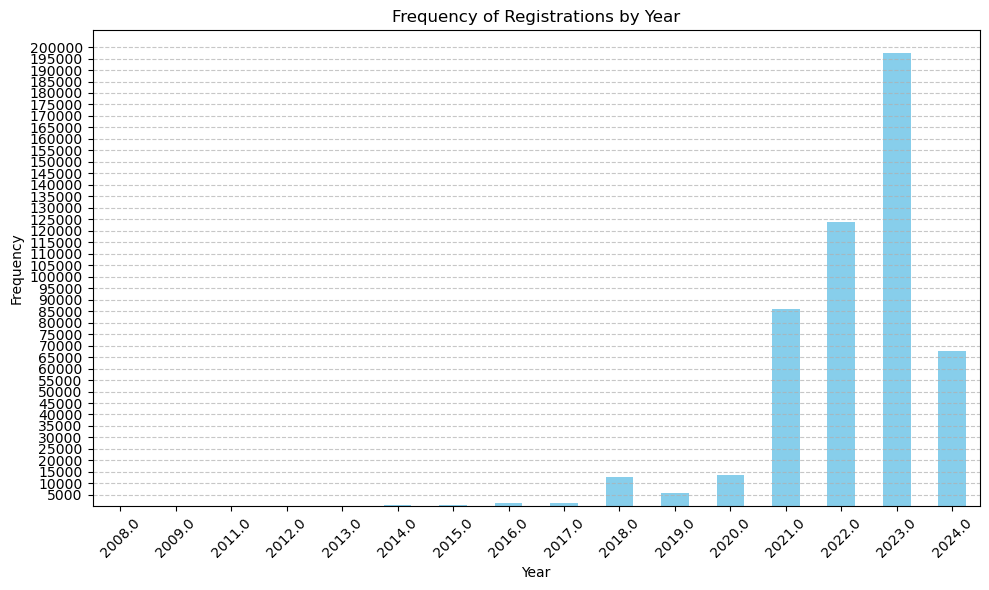

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered CSV file into a DataFrame
filtered_file = 'data/FILTERED_MN_EV_Registrations.csv'
df_EV_filtered = pd.read_csv(filtered_file)

# Count the frequency of registrations by year
yearly_registration_count = df_EV_filtered['registration_year'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
yearly_registration_count.plot(kind='bar', color='skyblue')
plt.title('Frequency of Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Set y-axis ticks
plt.yticks(range(5000, max(yearly_registration_count)+5000, 5000))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### React to the following statements:

##### Q) The largest number of new registrations was in 2023.

The largest number of new registrations was in 2023: YES
Look for the year with the highest frequency of registrations on the graph. It is showing that 2023 has the highest bar, so it supports the statement.

#### Q)The number of new registrations slowed in 2019.

The number of new registrations slowed in 2019: YES
Compare the frequency of registrations in 2019 to the previous years. If the bar for 2019 is shorter than the bars for the preceding years, it suggests a slowdown in registrations. 
From the graph we can see that registrations in 2018 are greater than in 2019. 

In [9]:
df_EV_filtered.shape

(511782, 5)

In [10]:
df_EV_filtered.columns

Index(['ZIP Code', 'Vehicle Make', 'Vehicle Model', 'registration_year',
       'Vehicle Model Year'],
      dtype='object')

## Use GeoPandas analyze and map datasets.

In [12]:
!pip install geopandas mapclassify folium

### Load the Shapefile ACS

In [13]:
import os
import zipfile
import requests

# Function to download and unzip the file
def download_and_unzip(url, folder):
    # Create the folder if it doesn't exist
    os.makedirs(folder, exist_ok=True)
    
    # Download the ZIP file
    response = requests.get(url)
    
    # Save the downloaded ZIP file
    zip_file_path = os.path.join(folder, "shp_society_census_acs.zip")
    with open(zip_file_path, 'wb') as f:
        f.write(response.content)
    
    # Unzip the file into the specified folder
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(folder)
    
    # Remove the downloaded ZIP file
    os.remove(zip_file_path)
    
    # Print a success message
    print(f"Data files saved successfully to '{folder}'.")

# URL of the ZIP file
zip_url = "https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_metc/society_census_acs/shp_society_census_acs.zip"

# Folder to unzip the files into
extract_to = "soc_data"

# Download and unzip the file
download_and_unzip(zip_url, extract_to)


Data files saved successfully to 'soc_data'.
